# Set 1: [Classifiers]Classifier
**2301212314_ChenYichao_Fintech**

In [32]:
import pandas as pd
import numpy as np
# df = pd.read_csv('../data/cs-training.csv')
df = pd.read_csv(r'D:\大学文件\No.8_2023-2024学年第二学期\机器学习\Kaggle-Give-Me-Some-Data\cs-training.csv')
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


## Data Preprocessing

In [26]:
for column in list(df.columns[df.isnull().sum() > 0]):
    mean_val = df[column].mean()
    df[column].fillna(mean_val, inplace=True)
df.drop(df.columns[0], axis=1,inplace=True)
df.columns = ['Default'] + ['X'+str(i) for i in range(1,11)]
df

,Default,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


In [27]:
df.describe()

,Default,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.100404
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [31]:
y_train = df['Default'].to_numpy()
X_train = df.drop(df.columns[0], axis=1).values

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)


In [34]:
X_train_std

array([[-0.02115001, -0.49385982,  0.37659296, ...,  4.40954554,
        -0.05785249,  1.12938692],
       [-0.02038516, -0.83234222, -0.10041896, ..., -0.90128301,
        -0.05785249,  0.22062674],
       [-0.02158222, -0.96773518,  0.138087  , ..., -0.90128301,
        -0.05785249, -0.68813345],
       ...,
       [-0.02323239,  0.38619443, -0.10041896, ..., -0.01614492,
        -0.05785249, -0.68813345],
       [-0.02421753, -1.50930703, -0.10041896, ..., -0.90128301,
        -0.05785249, -0.68813345],
       [-0.02081306,  0.79237332, -0.10041896, ...,  0.86899317,
        -0.05785249, -0.68813345]])

In [35]:
X_train_std.shape

(150000, 10)

## Select the 2 most important features using LogisticRegression with L1 penalty

In [46]:
    from sklearn.feature_selection import SelectFromModel
    X_new= SelectFromModel(LogisticRegression(penalty="l1", C=0.1,solver='liblinear'),max_features=2).fit_transform(X_train_std, y_train)
    X_new_TF=SelectFromModel(LogisticRegression(penalty="l1", C=0.1,solver='liblinear'),max_features=2).fit(X_train_std, y_train)
    X_new_TF.get_support()
    

array([False, False,  True, False, False, False, False, False,  True,
       False])

In [47]:
X_new

array([[ 0.37659296, -0.05785249],
       [-0.10041896, -0.05785249],
       [ 0.138087  , -0.05785249],
       ...,
       [-0.10041896, -0.05785249],
       [-0.10041896, -0.05785249],
       [-0.10041896, -0.05785249]])

## Apply LR / SVM / Decision Tree and try your own hyperparameters to maximize the prediction accuracy

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
def bestCofLR(X,y):
    log_reg = LogisticRegression()

    # Define the C value to be attempted
    param_grid = {'C': [0.0001,0.001, 0.01, 0.1, 1, 10, 100]}

    # Using Grid Search for Parameter Search
    grid_search = GridSearchCV(log_reg, param_grid, cv=5)
    grid_search.fit(X, y)

    # Output the optimal C value
    best_C = grid_search.best_params_['C']
    print("Best C value:", best_C)
    return grid_search.best_estimator_

In [50]:
LR=bestCofLR(X_new,y_train)
LR

Best C value: 0.0001


LogisticRegression(C=0.0001)

In [51]:
from sklearn.svm import SVC
def bestGammaofSVM(X,y):
    svm = SVC(kernel='linear')

    # Define the C value to be attempted
    param_grid = {'C': [ 0.01,1,10]}

    # Using Grid Search for Parameter Search
    grid_search = GridSearchCV(svm, param_grid, cv=2)
    grid_search.fit(X, y)

    # Output the optimal C value
    best_C = grid_search.best_params_['C']
    print("Best C value:", best_C)
    return grid_search.best_estimator_

In [71]:
SVM=bestGammaofSVM(X_new,y_train)
SVM

Best C value: 0.01


SVC(C=0.01, kernel='linear')

In [54]:
from sklearn.tree import DecisionTreeClassifier
def bestDepthofDT(X,y):
    tree = DecisionTreeClassifier()

    # Define the depth value of the tree to be attempted
    param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    # Using Grid Search for Parameter Search
    grid_search = GridSearchCV(tree, param_grid, cv=5)
    grid_search.fit(X, y)

    # Output the depth value of the best tree
    best_depth = grid_search.best_params_['max_depth']
    print("Best tree depth:", best_depth)
    return grid_search.best_estimator_

In [55]:
DT=bestDepthofDT(X_new,y_train)
DT

Best tree depth: 4


DecisionTreeClassifier(max_depth=4)

## Visualize  classifiers using the `plot_decision_regions` function

In [56]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.1):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    print(xx1.shape)
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='g',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

(256, 254)


C:\Users\Eleven最沉着\AppData\Local\Temp\ipykernel_46308\2301821036.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


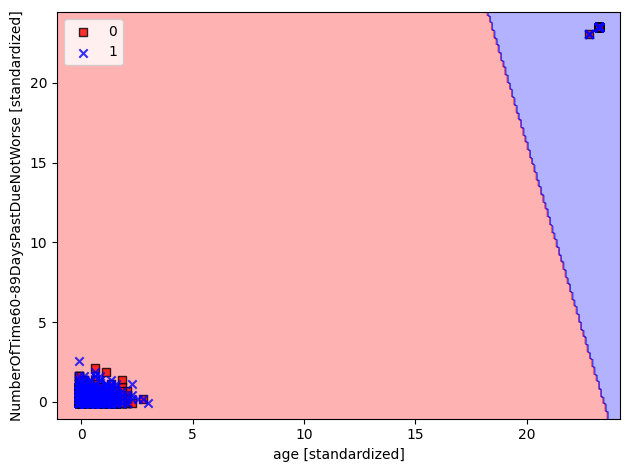

In [59]:
plot_decision_regions(X=X_new, y=y_train,classifier=LR)
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime60-89DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

(256, 254)


C:\Users\Eleven最沉着\AppData\Local\Temp\ipykernel_46308\2301821036.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


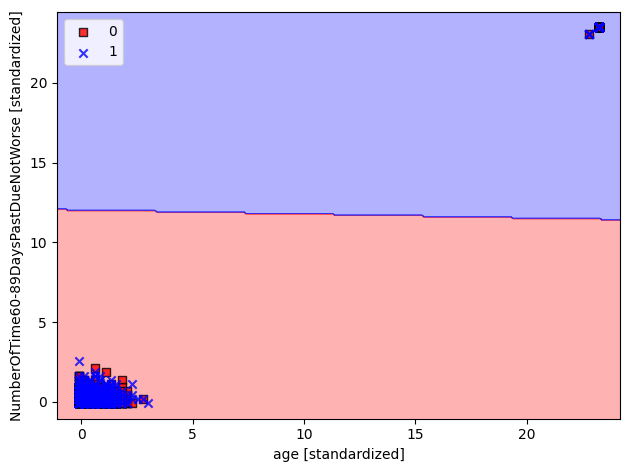

In [72]:
plot_decision_regions(X=X_new, y=y_train, classifier=SVM)
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime60-89DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

(256, 254)


C:\Users\Eleven最沉着\AppData\Local\Temp\ipykernel_46308\2301821036.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


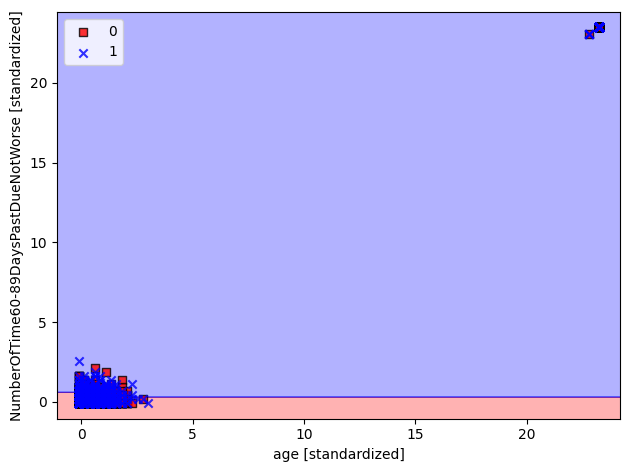

In [61]:
plot_decision_regions(X=X_new, y=y_train, classifier=DT)
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime60-89DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Remove some extreme values to make the results more intuitive

In [62]:
X_y_combined_std_cut = pd.DataFrame( X_new,y_train)
X_y_combined_std_cut.reset_index(inplace=True)
X_y_combined_std_cut.columns = ['y','X0','X1']

In [63]:
X_y_combined_std_cut=X_y_combined_std_cut[(X_y_combined_std_cut['X1'] <5) & (X_y_combined_std_cut['X0'] >-3)]

In [65]:
X_combined_std_cut = X_y_combined_std_cut.values[:,1:]
y_combined_cut = X_y_combined_std_cut.values[:,0]

(47, 52)


C:\Users\Eleven最沉着\AppData\Local\Temp\ipykernel_46308\2301821036.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


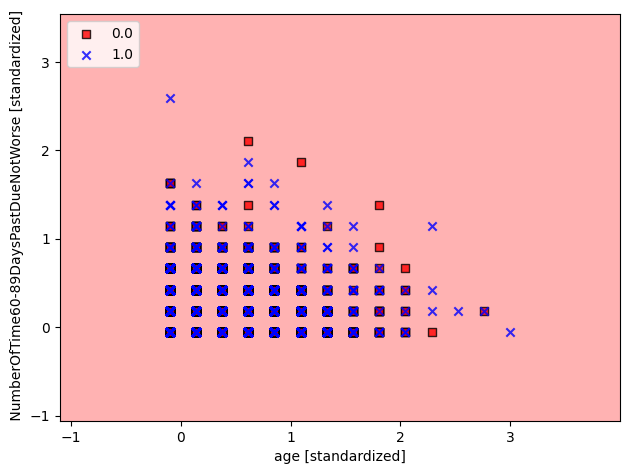

In [68]:
plot_decision_regions(X=X_combined_std_cut, y=y_combined_cut,
                      classifier=LR)
plt.xlabel('age [standardized]')
plt.ylabel(' NumberOfTime60-89DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

(47, 52)


C:\Users\Eleven最沉着\AppData\Local\Temp\ipykernel_46308\2301821036.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


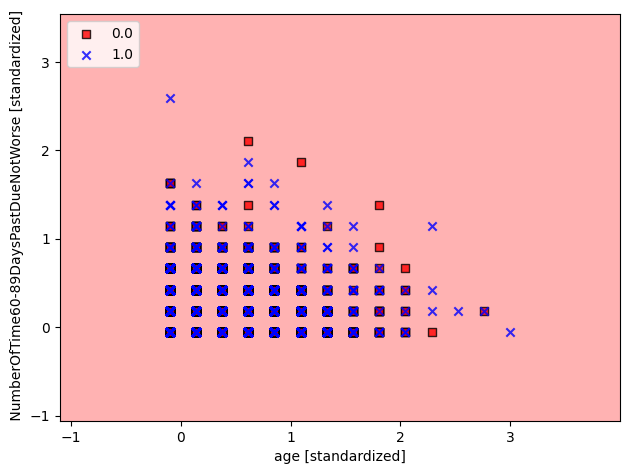

In [73]:
plot_decision_regions(X=X_combined_std_cut, y=y_combined_cut,
                      classifier=SVM)
plt.xlabel('age [standardized]')
plt.ylabel(' NumberOfTime60-89DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

(47, 52)


C:\Users\Eleven最沉着\AppData\Local\Temp\ipykernel_46308\2301821036.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


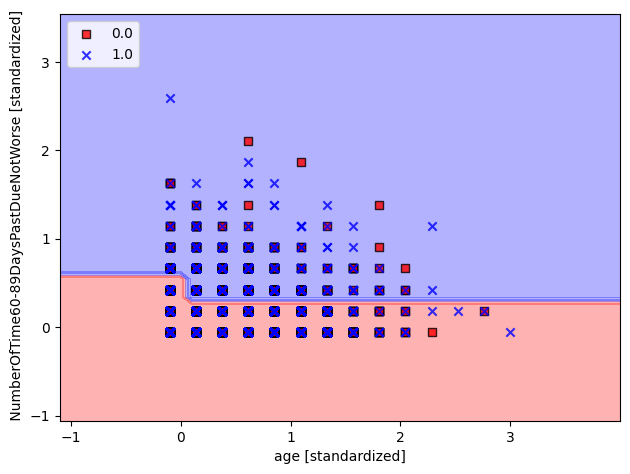

In [69]:
plot_decision_regions(X=X_combined_std_cut, y=y_combined_cut,
                      classifier=DT)
plt.xlabel('age [standardized]')
plt.ylabel(' NumberOfTime60-89DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()